"""
Date: 2022-10-01
Author: Martin Loza
Name: First test on mcool files
"""

On this notebook I will test the mcool files and the cooltools package to import them and explore them


In [43]:
import cooler
import matplotlib.pyplot as plt
import pandas as pd
import h5py

#Global variables
date = 231208
seed = 777
in_dir = "/Volumes/MARTIN_LOZA/Projects/HK_Interactions/Data/HiC/SRA/"
our_dir = "~/Documents/Projects/HK_Interactions/Analysis/2023_12_12/Results/"

In [72]:
#test for importing cooler


#cooler.fileops.list_coolers(in_dir + "GM12878-HindIII-allReps-filtered.mcool" )
res = 1000000
tcooler = cooler.Cooler(in_dir + "GM12878-HindIII-allReps-filtered.mcool::resolutions/" + str(res))
tcooler.bins()[:10]


,chrom,start,end,weight
0,chr1,0,1000000,0.002867
1,chr1,1000000,2000000,0.004237
2,chr1,2000000,3000000,0.005070
3,chr1,3000000,4000000,0.004293
4,chr1,4000000,5000000,0.004339
5,chr1,5000000,6000000,0.003502
6,chr1,6000000,7000000,0.002914
7,chr1,7000000,8000000,0.003173
8,chr1,8000000,9000000,0.002981
9,chr1,9000000,10000000,0.003161


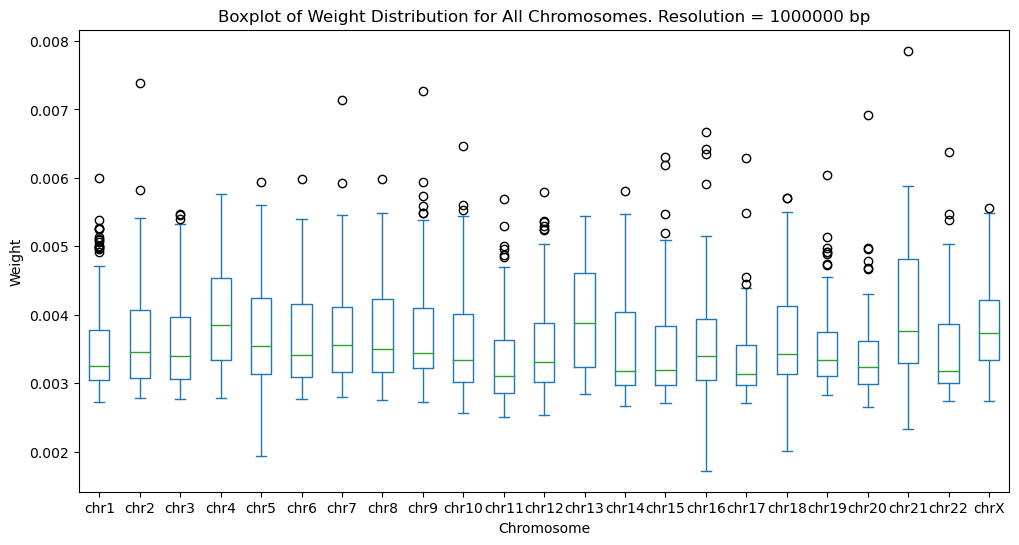

In [74]:
# Get the unique chromosomes in the tcooler object
chromosomes = tcooler.chromnames

# Create an empty list to store the weights for each chromosome
weights_list = []

# Iterate over each chromosome
for chromosome in chromosomes:
    # Get the weight column for the current chromosome
    weights = tcooler.bins().fetch(chromosome)['weight']
    
    # Append the weights to the list
    weights_list.append(weights)

# Convert the weights list to a data frame
weights_df = pd.DataFrame(weights_list, index=chromosomes).T

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Create the boxplot
weights_df.plot.box(ax=ax)
plt.title("Boxplot of Weight Distribution for All Chromosomes. Resolution = " + str(res) + " bp")
plt.xlabel("Chromosome")
plt.ylabel("Weight")
plt.show()

In [76]:
# Open mcool file
mcool_file = h5py.File(in_dir + "GM12878-HindIII-allReps-filtered.mcool")
# Get the available resolutions in the mcool file
resolutions = tcooler.resolutions()

# Iterate over each resolution
for res in resolutions:
    # Get the cooler object for the current resolution
    tcooler_res = cooler.Cooler(in_dir + "GM12878-HindIII-allReps-filtered.mcool::resolutions/" + str(res))
    
    # Get the unique chromosomes in the tcooler_res object
    chromosomes = tcooler_res.chromnames
    
    # Create an empty list to store the weights for each chromosome
    weights_list = []
    
    # Iterate over each chromosome
    for chromosome in chromosomes:
        # Get the weight column for the current chromosome
        weights = tcooler_res.bins().fetch(chromosome)['weight']
        
        # Append the weights to the list
        weights_list.append(weights)
    
    # Convert the weights list to a data frame
    weights_df = pd.DataFrame(weights_list, index=chromosomes).T
    
    # Set the figure size
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create the boxplot
    weights_df.plot.box(ax=ax)
    plt.title("Boxplot of Weight Distribution for All Chromosomes. Resolution = " + str(res) + " bp")
    plt.xlabel("Chromosome")
    plt.ylabel("Weight")
    plt.show()


NameError: name 'h5py' is not defined